In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('penguins.csv')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

<Axes: >

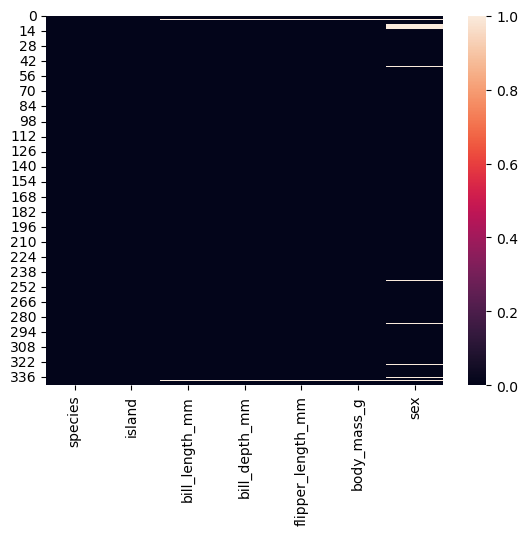

In [4]:
sb.heatmap(df.isnull())

In [5]:
df.isnull().sum()/df.shape[0]*100

species              0.000000
island               0.000000
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
dtype: float64

In [6]:
a=df['bill_length_mm'].mean()
a

43.9219298245614

In [7]:
df['bill_length_mm'].fillna(a,inplace=True)

In [8]:
b=df['bill_depth_mm'].mean()
b

17.151169590643278

In [9]:
df['bill_depth_mm'].fillna(b,inplace=True)

In [10]:
c=df['flipper_length_mm'].mean()
c

200.91520467836258

In [11]:
df['flipper_length_mm'].fillna(c,inplace=True)

In [12]:
d=df['body_mass_g'].mean()
d

4201.754385964912

In [13]:
df['body_mass_g'].fillna(d,inplace=True)


In [14]:
df['sex'].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [15]:
df['sex'].fillna('MALE',inplace=True)

<Axes: >

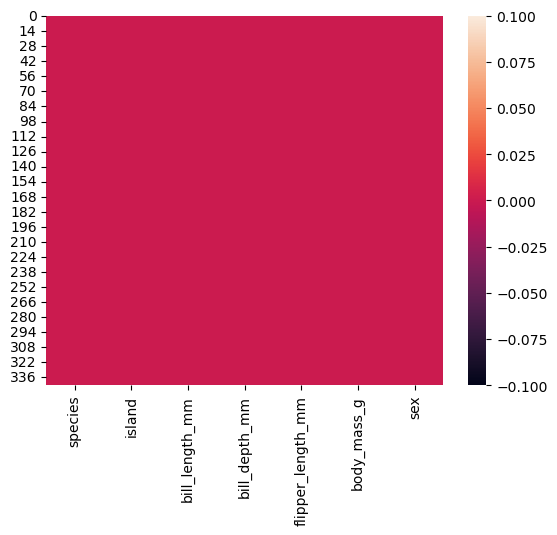

In [16]:
sb.heatmap(df.isnull())

<Axes: xlabel='bill_length_mm', ylabel='species'>

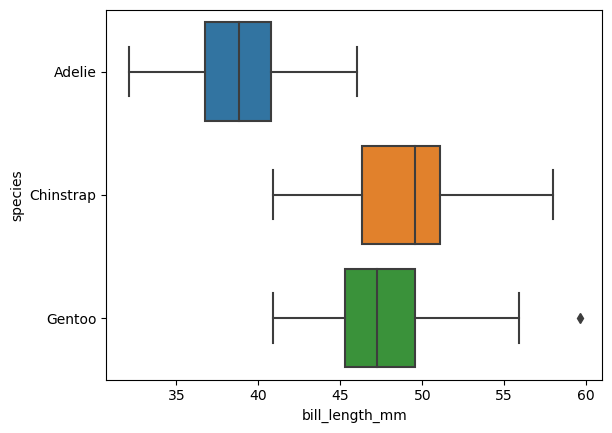

In [17]:
sb.boxplot(data=df,x='bill_length_mm',y='species')

In [18]:

df[(df['species']=='Gentoo')&(df['bill_length_mm']>56)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,MALE


In [19]:
q1=df[(df['species']=='Gentoo')&(df['bill_length_mm']>59)].index
q1

Int64Index([253], dtype='int64')

In [20]:
# df.drop(253,inplace=True)

<Axes: xlabel='body_mass_g', ylabel='species'>

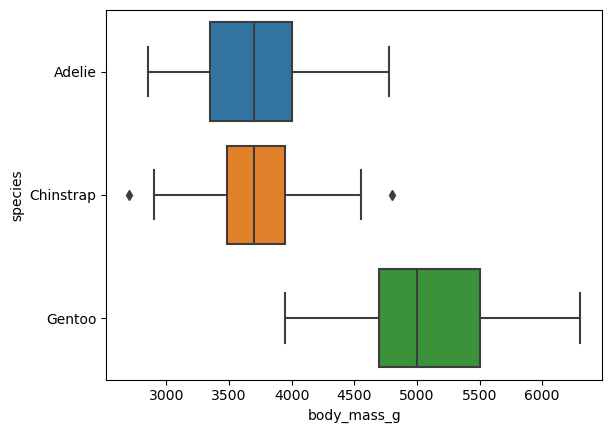

In [21]:
sb.boxplot(data=df,x='body_mass_g',y='species')

In [22]:
q3=df[(df['species']=='Chinstrap')&(df['body_mass_g']>4500)].index
q3

Int64Index([181, 189], dtype='int64')

In [23]:
df.drop(q3,inplace=True)

In [24]:
q4=df[(df['species']=='Chinstrap')&(df['body_mass_g']<3000)].index
q4

Int64Index([174, 190], dtype='int64')

In [25]:
df.drop(q4,inplace=True)

<Axes: xlabel='body_mass_g', ylabel='species'>

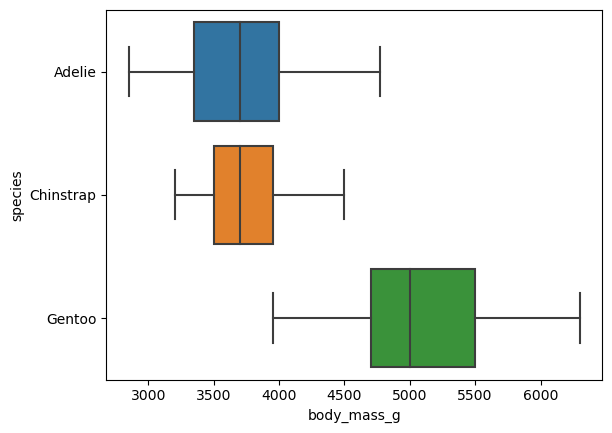

In [26]:
sb.boxplot(data=df,x='body_mass_g',y='species')

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

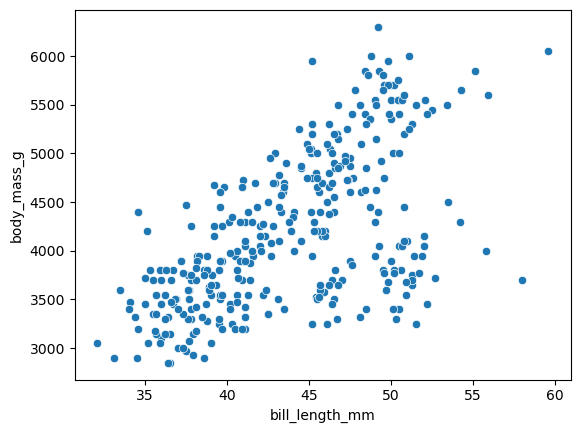

In [27]:
sb.scatterplot(data=df,x='bill_length_mm',y='body_mass_g')

<Axes: xlabel='bill_depth_mm', ylabel='body_mass_g'>

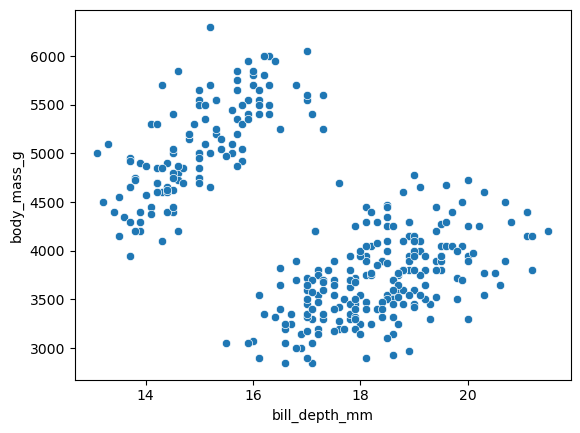

In [28]:
sb.scatterplot(data=df,x='bill_depth_mm',y='body_mass_g')

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

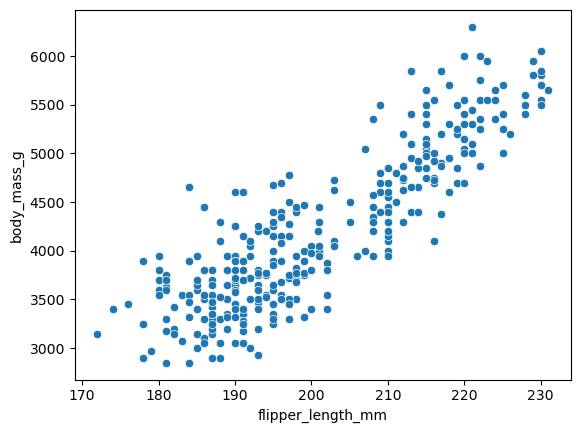

In [29]:
sb.scatterplot(data=df,x='flipper_length_mm',y='body_mass_g')

<Axes: >

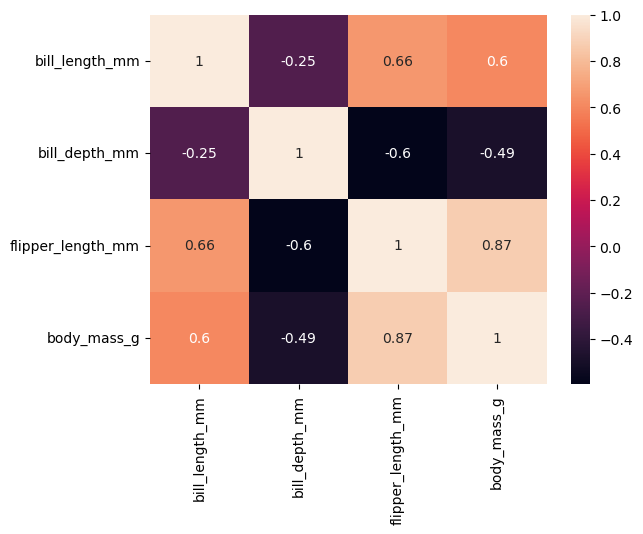

In [30]:
sb.heatmap(df.corr(),annot=True)

In [31]:
X=df['flipper_length_mm']
Y=df['body_mass_g']

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [33]:
X_train.shape

(238,)

In [34]:
X_test.shape

(102,)

In [35]:
Y_train.shape

(238,)

In [36]:
Y_test.shape

(102,)

In [37]:
X_train = X_train.to_numpy().reshape(-1, 1)

# Do the same for 'X_test' if needed
X_test = X_test.to_numpy().reshape(-1, 1)

In [38]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [39]:
X_train

array([[-0.95937866],
       [ 1.17800858],
       [ 1.3917473 ],
       [ 0.67928489],
       [-0.24691625],
       [ 0.53679241],
       [ 1.32050106],
       [-0.81688618],
       [ 0.60803865],
       [-0.95937866],
       [-1.0306249 ],
       [-0.95937866],
       [-0.38940873],
       [-1.10187114],
       [-0.53190121],
       [-0.31816249],
       [-0.74563993],
       [ 0.60803865],
       [-0.53190121],
       [-1.38685611],
       [ 0.67928489],
       [-0.67439369],
       [-0.46065497],
       [-0.53190121],
       [-0.88813242],
       [ 0.32305369],
       [-0.74563993],
       [-0.60314745],
       [-0.38940873],
       [-0.17567   ],
       [ 0.67928489],
       [ 1.96171724],
       [-0.46065497],
       [ 0.10931496],
       [-1.10187114],
       [ 0.39429993],
       [-0.38940873],
       [-0.38940873],
       [-1.38685611],
       [ 0.82177737],
       [-0.38940873],
       [ 1.32050106],
       [ 1.53423979],
       [-0.53190121],
       [-0.53190121],
       [-0

In [40]:
X_test

array([[-1.24436362],
       [-0.10442376],
       [-1.45810235],
       [ 0.46554617],
       [ 0.89302362],
       [ 1.0355161 ],
       [-0.53190121],
       [-1.17311738],
       [-0.74563993],
       [-0.67439369],
       [-0.10442376],
       [ 0.67928489],
       [ 0.10931496],
       [-0.17567   ],
       [-0.53190121],
       [ 1.53423979],
       [ 1.10676234],
       [ 1.67673227],
       [ 1.10676234],
       [ 1.24925482],
       [ 2.10420972],
       [-0.81688618],
       [ 1.3917473 ],
       [-1.38685611],
       [ 1.53423979],
       [-1.74308731],
       [ 1.46299355],
       [ 1.3917473 ],
       [ 1.74797851],
       [ 1.3917473 ],
       [-0.17567   ],
       [-0.03317752],
       [ 0.96426986],
       [-0.74563993],
       [-1.17311738],
       [ 0.1805612 ],
       [-0.46065497],
       [-0.24691625],
       [ 0.60803865],
       [-0.95937866],
       [ 1.24925482],
       [-0.24691625],
       [-1.60059483],
       [-0.46065497],
       [ 1.0355161 ],
       [ 0

In [41]:
X_test

array([[-1.24436362],
       [-0.10442376],
       [-1.45810235],
       [ 0.46554617],
       [ 0.89302362],
       [ 1.0355161 ],
       [-0.53190121],
       [-1.17311738],
       [-0.74563993],
       [-0.67439369],
       [-0.10442376],
       [ 0.67928489],
       [ 0.10931496],
       [-0.17567   ],
       [-0.53190121],
       [ 1.53423979],
       [ 1.10676234],
       [ 1.67673227],
       [ 1.10676234],
       [ 1.24925482],
       [ 2.10420972],
       [-0.81688618],
       [ 1.3917473 ],
       [-1.38685611],
       [ 1.53423979],
       [-1.74308731],
       [ 1.46299355],
       [ 1.3917473 ],
       [ 1.74797851],
       [ 1.3917473 ],
       [-0.17567   ],
       [-0.03317752],
       [ 0.96426986],
       [-0.74563993],
       [-1.17311738],
       [ 0.1805612 ],
       [-0.46065497],
       [-0.24691625],
       [ 0.60803865],
       [-0.95937866],
       [ 1.24925482],
       [-0.24691625],
       [-1.60059483],
       [-0.46065497],
       [ 1.0355161 ],
       [ 0

In [42]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [43]:
lr.coef_

array([707.97465572])

In [44]:
lr.intercept_

4187.094574671975

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [46]:
ypred=lr.predict(X_test)
ypred

array([3306.11666661, 4113.16519723, 3154.79506712, 4516.68946254,
       4819.33266152, 4920.21372785, 3810.52199825, 3356.55719977,
       3659.20039876, 3709.64093192, 4113.16519723, 4668.01106203,
       4264.48679672, 4062.72466406, 3810.52199825, 5273.29745999,
       4970.65426101, 5374.17852632, 4970.65426101, 5071.53532734,
       5676.8217253 , 3608.75986559, 5172.41639366, 3205.23560028,
       5273.29745999, 2953.03293446, 5222.85692683, 5172.41639366,
       5424.61905948, 5172.41639366, 4062.72466406, 4163.60573039,
       4869.77319468, 3659.20039876, 3356.55719977, 4314.92732988,
       3860.96253141, 4012.2841309 , 4617.57052886, 3507.87879926,
       5071.53532734, 4012.2841309 , 3053.91400079, 3860.96253141,
       4920.21372785, 4567.1299957 , 3608.75986559, 4668.01106203,
       5021.09479417, 3406.99773294, 4668.01106203, 3760.08146508,
       4768.89212836, 5676.8217253 , 3255.67613345, 4314.92732988,
       3507.87879926, 5222.85692683, 4819.33266152, 4516.68946

In [47]:
dict={'Actual data':Y_test,"PREdict data":ypred}
dd=pd.DataFrame(dict)
dd

,Actual data,PREdict data
102,3075.0,3306.116667
125,4000.0,4113.165197
11,3700.0,3154.795067
252,5050.0,4516.689463
242,4400.0,4819.332662
...,...,...
275,5050.0,5172.416394
246,4100.0,4970.654261
342,5200.0,4768.892128
39,4650.0,3356.557200
